In [316]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Задача 1
Из партии батареек с номинальным напряжением 12 В наугад выбрано семь штук. Согласно показаниям высокоточного вольтметра, фактически выдаваемое ими напряжение составило: 12,9; 11,6; 13,5; 13,9; 12,1; 11,9; 13,0 В соответственно. Можно ли считать, что среднее напряжение действительно равно 12 В?

In [166]:
Voltmetr = [12.9, 11.6, 13.5, 13.9, 12.1, 11.9, 13.0]
M = 12

In [168]:
stats.shapiro(Voltmetr) 

ShapiroResult(statistic=0.9461528332649153, pvalue=0.6946012511014426)

Распределение нормальное

H0  - среднее напряжение равно 12B,  
H1 - среднее напряжение  не равно 12В  
критерий Стюдента двухсторонний

In [279]:
# решение кодом
_mean  =  np.sum(Voltmetr)/ len(Voltmetr)
D =  np.sum((Voltmetr - x_mean)**2)/ len(Voltmetr)
T = ((x_mean  - M) * ((len(Voltmetr) -1)**0.5))/(D**0.5)
student = stats.t((len(Voltmetr) -1))

P = min( 2 * (1 - student.cdf(T)), 2* student.cdf(T))
print('T statistic:', T, 'p-value:', P)

T statistic: 2.1578017974978794 p-value: 0.07430190210562304


In [282]:
#библиотекой
t_stat, p_value = stats.ttest_1samp(Voltmetr, M)

print("T statistic:", t_stat)
print("P-value:", p_value)

T statistic: 2.1578017974978794
P-value: 0.07430190210562303


p-value  = 0.07 -> При уровне значимости 0.05  не достаточно оснований, чтобы отвергнуть нулевую гипотезу о равенстве среднего напряжения  12 B. Однако результата близок к пограничному и можно посоветовать один раз увеличить выборку и провести повторный эксперимент. 

# Задача 2
Есть два различных метода определения процентного содержания жира в мясе. Доля жира для 10 образцов мяса была определена каждым из двух методов. Позволяют ли полученные результаты сделать вывод о том, что один метод даёт в среднем более высокие показания, чем другой?

Нулевая гипотеза - средняя разность = 0,  
Альтернативная не равна 0,   
Критерий стьюдента для парных выборок

In [284]:
method_1 = [23.1, 23.2, 26.5, 26.6, 27.1, 48.3, 40.5, 25.0, 38.4, 23.5]
method_2 = [22.7, 23.6, 27.1, 27.4, 27.4, 46.8, 40.4, 24.9, 38.1, 23.8]

In [288]:
print(np.mean(method_1 ), np.mean(method_2 ))

30.22 30.220000000000006


In [185]:
D =  np.array(method_1) -  np.array( method_2)

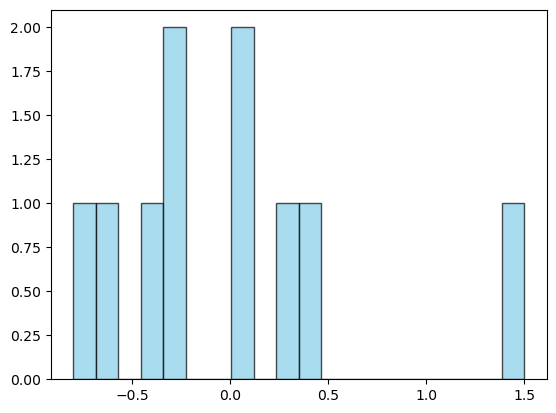

In [249]:
plt.hist(D, bins=20, color='skyblue', edgecolor='black', alpha=0.7);

In [158]:
stats.shapiro(D) 

ShapiroResult(statistic=0.8998483579792755, pvalue=0.21825780478589868)

Распределение нормальное

In [271]:
#кодом
D_mean = np.sum(D) / len(D)
S =  (np.sum((D - D_mean)**2) / len(D)) **0.5
T = D_mean *(len(D) - 1)**0.5 / S
student = stats.t(len(D -1))
P = min( 2 * (1 - student.cdf(T)), 2* student.cdf(T))

In [268]:
T, P

(1.715488497867803e-15, 0.9999999999999987)

In [273]:
#библиотекой
res = stats.ttest_rel(method_1, method_2) 

In [258]:
res

TtestResult(statistic=1.7154884978678027e-15, pvalue=0.9999999999999987, df=9)

In [235]:
res.pvalue

0.9999999999999987

pvalue = 1, что значит, что у нас нет оснований отвергнуть нулевую гипотезу о равенстве средних измеренных двумя методами.  Другими словами - статистически значимых различий между методами не обнаружено

# Задача 3
Для проверки гипотезы о том, что жители городов имеют в среднем более высокое систолическое артериальное давление, чем жители сельской местности, было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления для горожан: 132, 111, 119, 138, 200, 131, 138, 170, 159, 140; для селян: 115, 190, 127, 155, 148, 121, 116, 121, 197. Можно ли считать верной выдвинутую гипотезу на уровне значимости 0,05?



In [111]:
city = [132, 111, 119, 138, 200, 131, 138, 170, 159, 140]
country = [115, 190, 127, 155, 148, 121, 116, 121, 197]

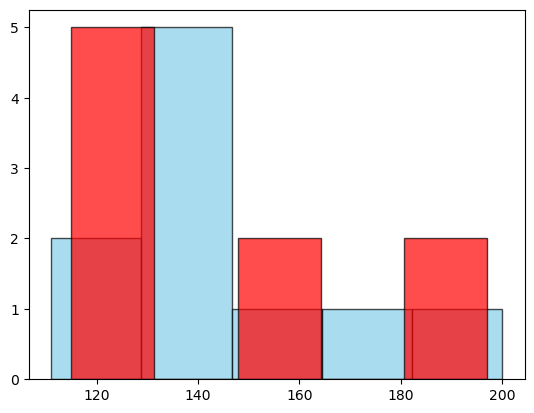

In [296]:
plt.hist(city, bins=5, color='skyblue', edgecolor='black', alpha=0.7);
plt.hist(country, bins=5, color='red', edgecolor='black', alpha=0.7);

In [160]:
stats.shapiro(city) 

ShapiroResult(statistic=0.9100654196723891, pvalue=0.28144068693781604)

In [312]:
stats.shapiro(country) 

ShapiroResult(statistic=0.8286640993349572, pvalue=0.04313951145476055)

Распределение для селян не прошло тест на нормальность и выборка не достаточно большая, чтобы использовать ЦПТ значит лучше использовать тест Манна-Уитни.

In [306]:
np.mean(country), np.std(country), 

(143.33333333333334, 29.870089089626468)

In [304]:
np.mean(city), np.std(city), 

(143.8, 24.80241923684059)

stats.mannwhitneyu(city, country)

pvalue = 0.71  -> у нас недостаточно оснований отклонить нулевую гипотезу о равенстве давлений на уровне значимости 0.05. Иными словами статистически значимой разницы между систолическим артериальным давлением горожан и селян не обнаружено. 

# Задача 4
Известно, что 52% новорождённых детей — мальчики, а 48% — девочки. В случайной выборке из 5 000 человек в возрасте от 30 до 60 лет мужчин оказалось 2 500. Можно ли на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова?

H0: вероятность встретить мужчину в выборке от 30 до 60 лет  0.52 (такая же как и среди новорожденных) 
H1:  p != 0.52
распределение биноминальное, тест биноминальный


In [656]:
n = 5000
k = 2500
p = 0.52

In [658]:
stats.binomtest(k, n, p)

BinomTestResult(k=2500, n=5000, alternative='two-sided', statistic=0.5, pvalue=0.004849502159545252)

pvalue = 0.005 -> у нас достаточно оснований, чтобы отклонить нулевую гипотезу на уровне значимости 0.05 и принять альтернативную, что процент мужчин в выборке 30 - 60 не равен 0.52, что может означать разный уровень смертности среди мужчин и женщин. (однако я бы не делала однозначный вывод, ведь могут существовать и другие факторы повлиявшие на изменения процентного соотношения мужчин и женщин.  Например, вдруг мужчины чаще уезжают жить заграницу и поэтому не попадают в выборку, или реже чем женщины участвуют в опросах)

# Задача 5

В первом эксперименте для сравнения двух средних X1=17, X2=16 применялся t-критерий Стьюдента, и эти различия оказались значимы (p = 0, 001).
Во втором исследовании, также при помощи t - критерия, сравнивались два средних X1=17, X2=36, и эти различия не значимы при p = 0,8. 
В чем может быть причина таких результатов, при условии, что нулевая и альтернативная гипотезы в обоих случаях одинаковы?

1) разный размер выборок в первом и втором случае (в первом больше)
2) разная  дисперсия в первом и втором случае (во втором больше)
см примеры ниже
3) может быть задан разный уровень значимости
4) возможно во втором случае были выбросы

In [606]:
n = 800

In [608]:
data_1 = np.random.normal(loc= 17, scale= 10, size=n)

In [610]:
data_2 = np.random.normal(loc= 16, scale= 10, size=n)

In [612]:
stats.ttest_ind(data_1, data_2) 

TtestResult(statistic=2.9540350730097864, pvalue=0.0031823413442464673, df=1598.0)

In [614]:
data_3 = np.random.normal(loc= 17, scale= 250, size=n)

In [616]:
data_4 = np.random.normal(loc= 36, scale= 250, size=n)

In [618]:
stats.ttest_ind(data_3, data_4) 

TtestResult(statistic=-1.1339306106609144, pvalue=0.2569937335323842, df=1598.0)

In [636]:
n = 5

In [638]:
data_3 = np.random.normal(loc= 17, scale= 10, size=n)

In [640]:
data_4 = np.random.normal(loc= 36, scale= 10, size=n)

In [642]:
stats.ttest_ind(data_3, data_4) 

TtestResult(statistic=-1.9669650632113473, pvalue=0.08474049379339663, df=8.0)